## 颜色

Matplotlib 通过 `color` 和 `alpha` 参数绘制图形中艺术家的颜色。

<div style="display: flex;">
<div style="float: left;">
    
|Parameters |Desc            |
|-----------|----------------|
|`color`    |设置图形中艺术家的颜色，[>>> 颜色格式 <<<](https://matplotlib.org/stable/users/explain/colors/colors.html#color-formats)|
|`alpha`    |设置颜色的透明度 |

</div>
</div>

### 颜色列表

Matplotlib 内置的颜色列表

- matplotlib.colors.BASE_COLORS
- matplotlib.colors.TABLEAU_COLORS
- matplotlib.colors.CSS4_COLORS
- matplotlib.colors.XKCD_COLORS

### alpha

`alpha` 参数控制颜色的透明度，取值是介于 $[0.0, 1.0]$ 之间的浮点数，$0.0$ 表示完全透明，$1.0$ 表示完全不透明。当颜色为半透明时，背景色会透过半透明显示出来。

`alpha` 参数根据公式将前景色与背景色混合，从而确定最终颜色。

$$\text{RGB}_\text{result} = \text{RGB}_\text{background} \times (1 - \text{alpha}) + \text{RGB}_\text{foreground} \times \text{alpha}$$

### CN 颜色

当绘制图形中艺术家没有显式指定 `color` 参数时，Matplotlib 会循环使用 `rcParams["axes.prop_cycle"]` 配置的颜色，也可以显式通过 `C0`、`C1`、...指定默认配置的第$0$、第$1$索引位置的颜色。

-----

### Table of Contents

<p>
  <div>
    <a href="#颜色列表"> <span class="toc-item-num">1&nbsp内置颜色列表</span> </a>
  </div>
  <div>
    <a href="#透明度"> <span class="toc-item-num">2&nbsp透明度</span> </a>
  </div>
   <div>
    <a href="#CN"> <span class="toc-item-num">3&nbspCN 颜色</span> </a>
  </div>
   <div>
    <a href="#CSS4和xkcd颜色对比"> <span class="toc-item-num">4&nbspCSS4和xkcd颜色对比</span> </a>
  </div>
</p>

-----

### 颜色列表

- matplotlib.colors.BASE_COLORS
- matplotlib.colors.TABLEAU_COLORS
- matplotlib.colors.CSS4_COLORS
- matplotlib.colors.XKCD_COLORS

In [2]:
%matplotlib widget
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

def plot_colortable(colors, *, ncols=4, sort_colors=True):
    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    if sort_colors:
        color_names = sorted(colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c)))) # Sort colors by hue, saturation, value and name.
    else:
        color_names = list(colors)
    nrows = math.ceil(len(color_names) / ncols)
    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72
    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height, (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_axis_off()

    for idx, color_name in enumerate(color_names):
        row = idx % nrows
        col = idx // nrows
        y = row * cell_height
        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7
        ax.text(text_pos_x, y, color_name, fontsize=14, horizontalalignment='left', verticalalignment='center')
        ax.add_patch(Rectangle(xy=(swatch_start_x, y-9), width=swatch_width, height=18, facecolor=colors[color_name], edgecolor='0.7'))
    return fig
    

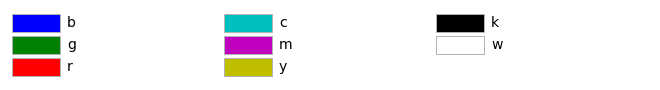

In [2]:
plot_colortable(mcolors.BASE_COLORS, ncols=3, sort_colors=False);

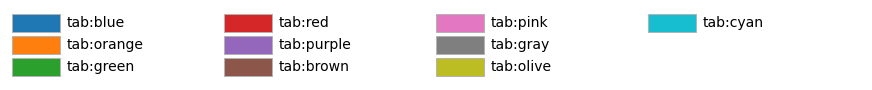

In [3]:
plot_colortable(mcolors.TABLEAU_COLORS, ncols=4, sort_colors=False);

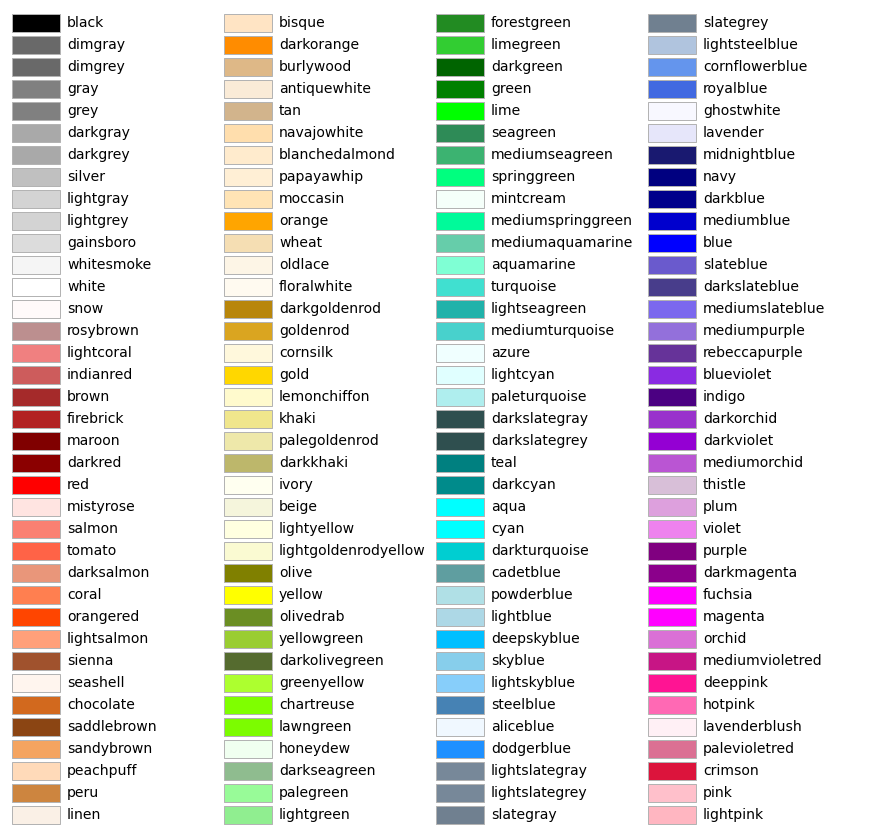

In [4]:
plot_colortable(mcolors.CSS4_COLORS, ncols=4, sort_colors=True);

### 透明度

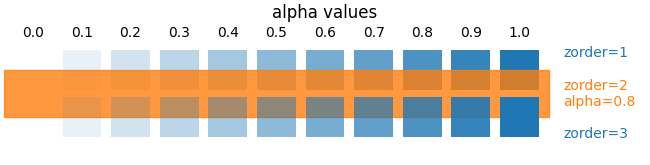

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(6.5, 1.65), layout='constrained')
ax.add_patch(Rectangle((-0.2, -0.35), 11.2, 0.7, color='C1', alpha=0.8))
for i, alpha in enumerate(np.linspace(0, 1, 11)):
    ax.add_patch(Rectangle((i, 0.05), 0.8, 0.6, alpha=alpha, zorder=0))
    ax.text(i+0.4, 0.85, f"{alpha:.1f}", ha='center')
    ax.add_patch(Rectangle((i, -0.05), 0.8, -0.6, alpha=alpha, zorder=2))
ax.set_xlim(-0.2, 13)
ax.set_ylim(-1, 1)
ax.set_title('alpha values')
ax.text(11.3, 0.6, 'zorder=1', va='center', color='C0')
ax.text(11.3, 0, 'zorder=2\nalpha=0.8', va='center', color='C1')
ax.text(11.3, -0.6, 'zorder=3', va='center', color='C0')
ax.axis('off');

### CN

In [3]:
mpl.rcParams["axes.prop_cycle"]

'#1f77b4'
'#ff7f0e'
'#2ca02c'
'#d62728'
'#9467bd'
'#8c564b'
'#e377c2'
'#7f7f7f'
'#bcbd22'
'#17becf'


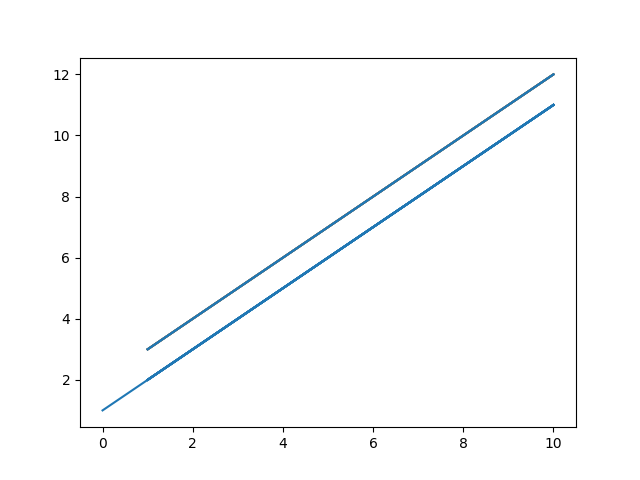

In [14]:
import numpy as np
x = np.linspace(1, 10, 10)
plt.plot(x, x+1, color="C0")
plt.plot(x, x+2, color="#1f77b4");
plt.show()

### CSS4和xkcd颜色对比

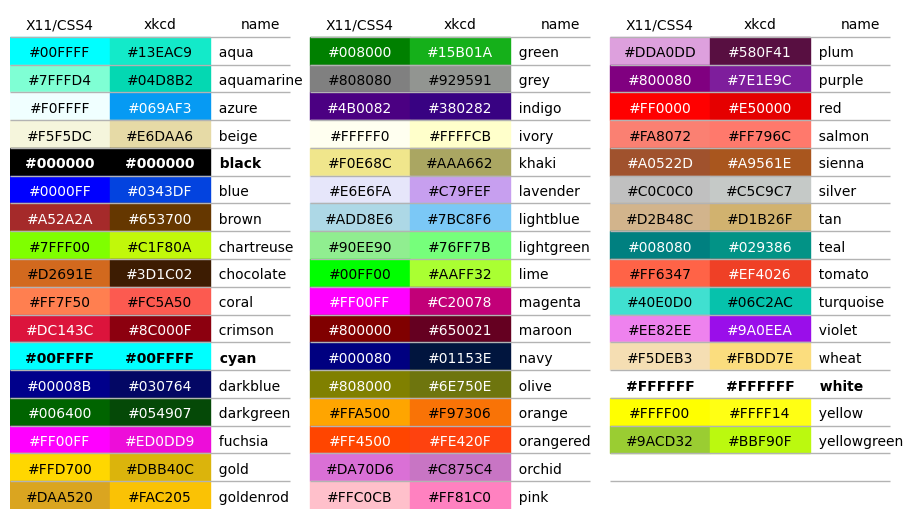

In [25]:
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatch

overlap = {name for name in mcolors.CSS4_COLORS if f"xkcd:{name}" in mcolors.XKCD_COLORS} # 在 CSS4 和 XKCD 中相同颜色名称的颜色

fig = plt.figure(figsize=(9, 5))
ax = fig.add_axes([0, 0, 1, 1])

n_groups = 3
n_rows = math.ceil(len(overlap) / n_groups)

for idx, color_name in enumerate(sorted(overlap)):
    css4 = mcolors.CSS4_COLORS[color_name]  # example: #00FFFF 
    xkcd = mcolors.XKCD_COLORS[f"xkcd:{color_name}"].upper() # example: #13EAC9

    # Pick text colour based on perceived luminance.
    rgba = mcolors.to_rgba_array([css4, xkcd])
    luma = 0.299 * rgba[:, 0] + 0.587 * rgba[:, 1] + 0.114 * rgba[:, 2]
    css4_text_color = "k" if luma[0] > 0.5 else "w"
    xkcd_text_color = "k" if luma[1] > 0.5 else "w"
    
    col_shift = (idx // n_rows) * 3
    y_pos = idx % n_rows
    text_args = dict(fontsize=10, weight="bold" if css4 == xkcd else None)
    ax.add_patch(mpatch.Rectangle((0 + col_shift, y_pos), 1, 1, color=css4))
    ax.add_patch(mpatch.Rectangle((1 + col_shift, y_pos), 1, 1, color=xkcd))
    ax.text(0.5 + col_shift, y_pos + .7, css4, color=css4_text_color, ha="center", **text_args)
    ax.text(1.5 + col_shift, y_pos + .7, xkcd, color=xkcd_text_color, ha="center", **text_args)
    ax.text(2 + col_shift, y_pos + .7, f"  {color_name}", **text_args)

for g in range(n_groups):
    ax.hlines(range(n_rows), 3*g, 3*g + 2.8, color="0.7", linewidth=1)
    ax.text(0.5 + 3*g, -0.3, "X11/CSS4", ha="center")
    ax.text(1.5 + 3*g, -0.3, "xkcd", ha="center") 
    ax.text(2.5 + 3*g, -0.3, "name", ha="center")
    
ax.set_xlim(0, 3 * n_groups)
ax.set_ylim(n_rows, -1)
ax.axis('off')

plt.show()